# Income Prediction

### Context
What is Census?

The United Nations defines a population census as the total process of collecting, compiling, and publishing demographic, economic, and social data pertaining to a specific time to all persons in a country or delimited part of a country
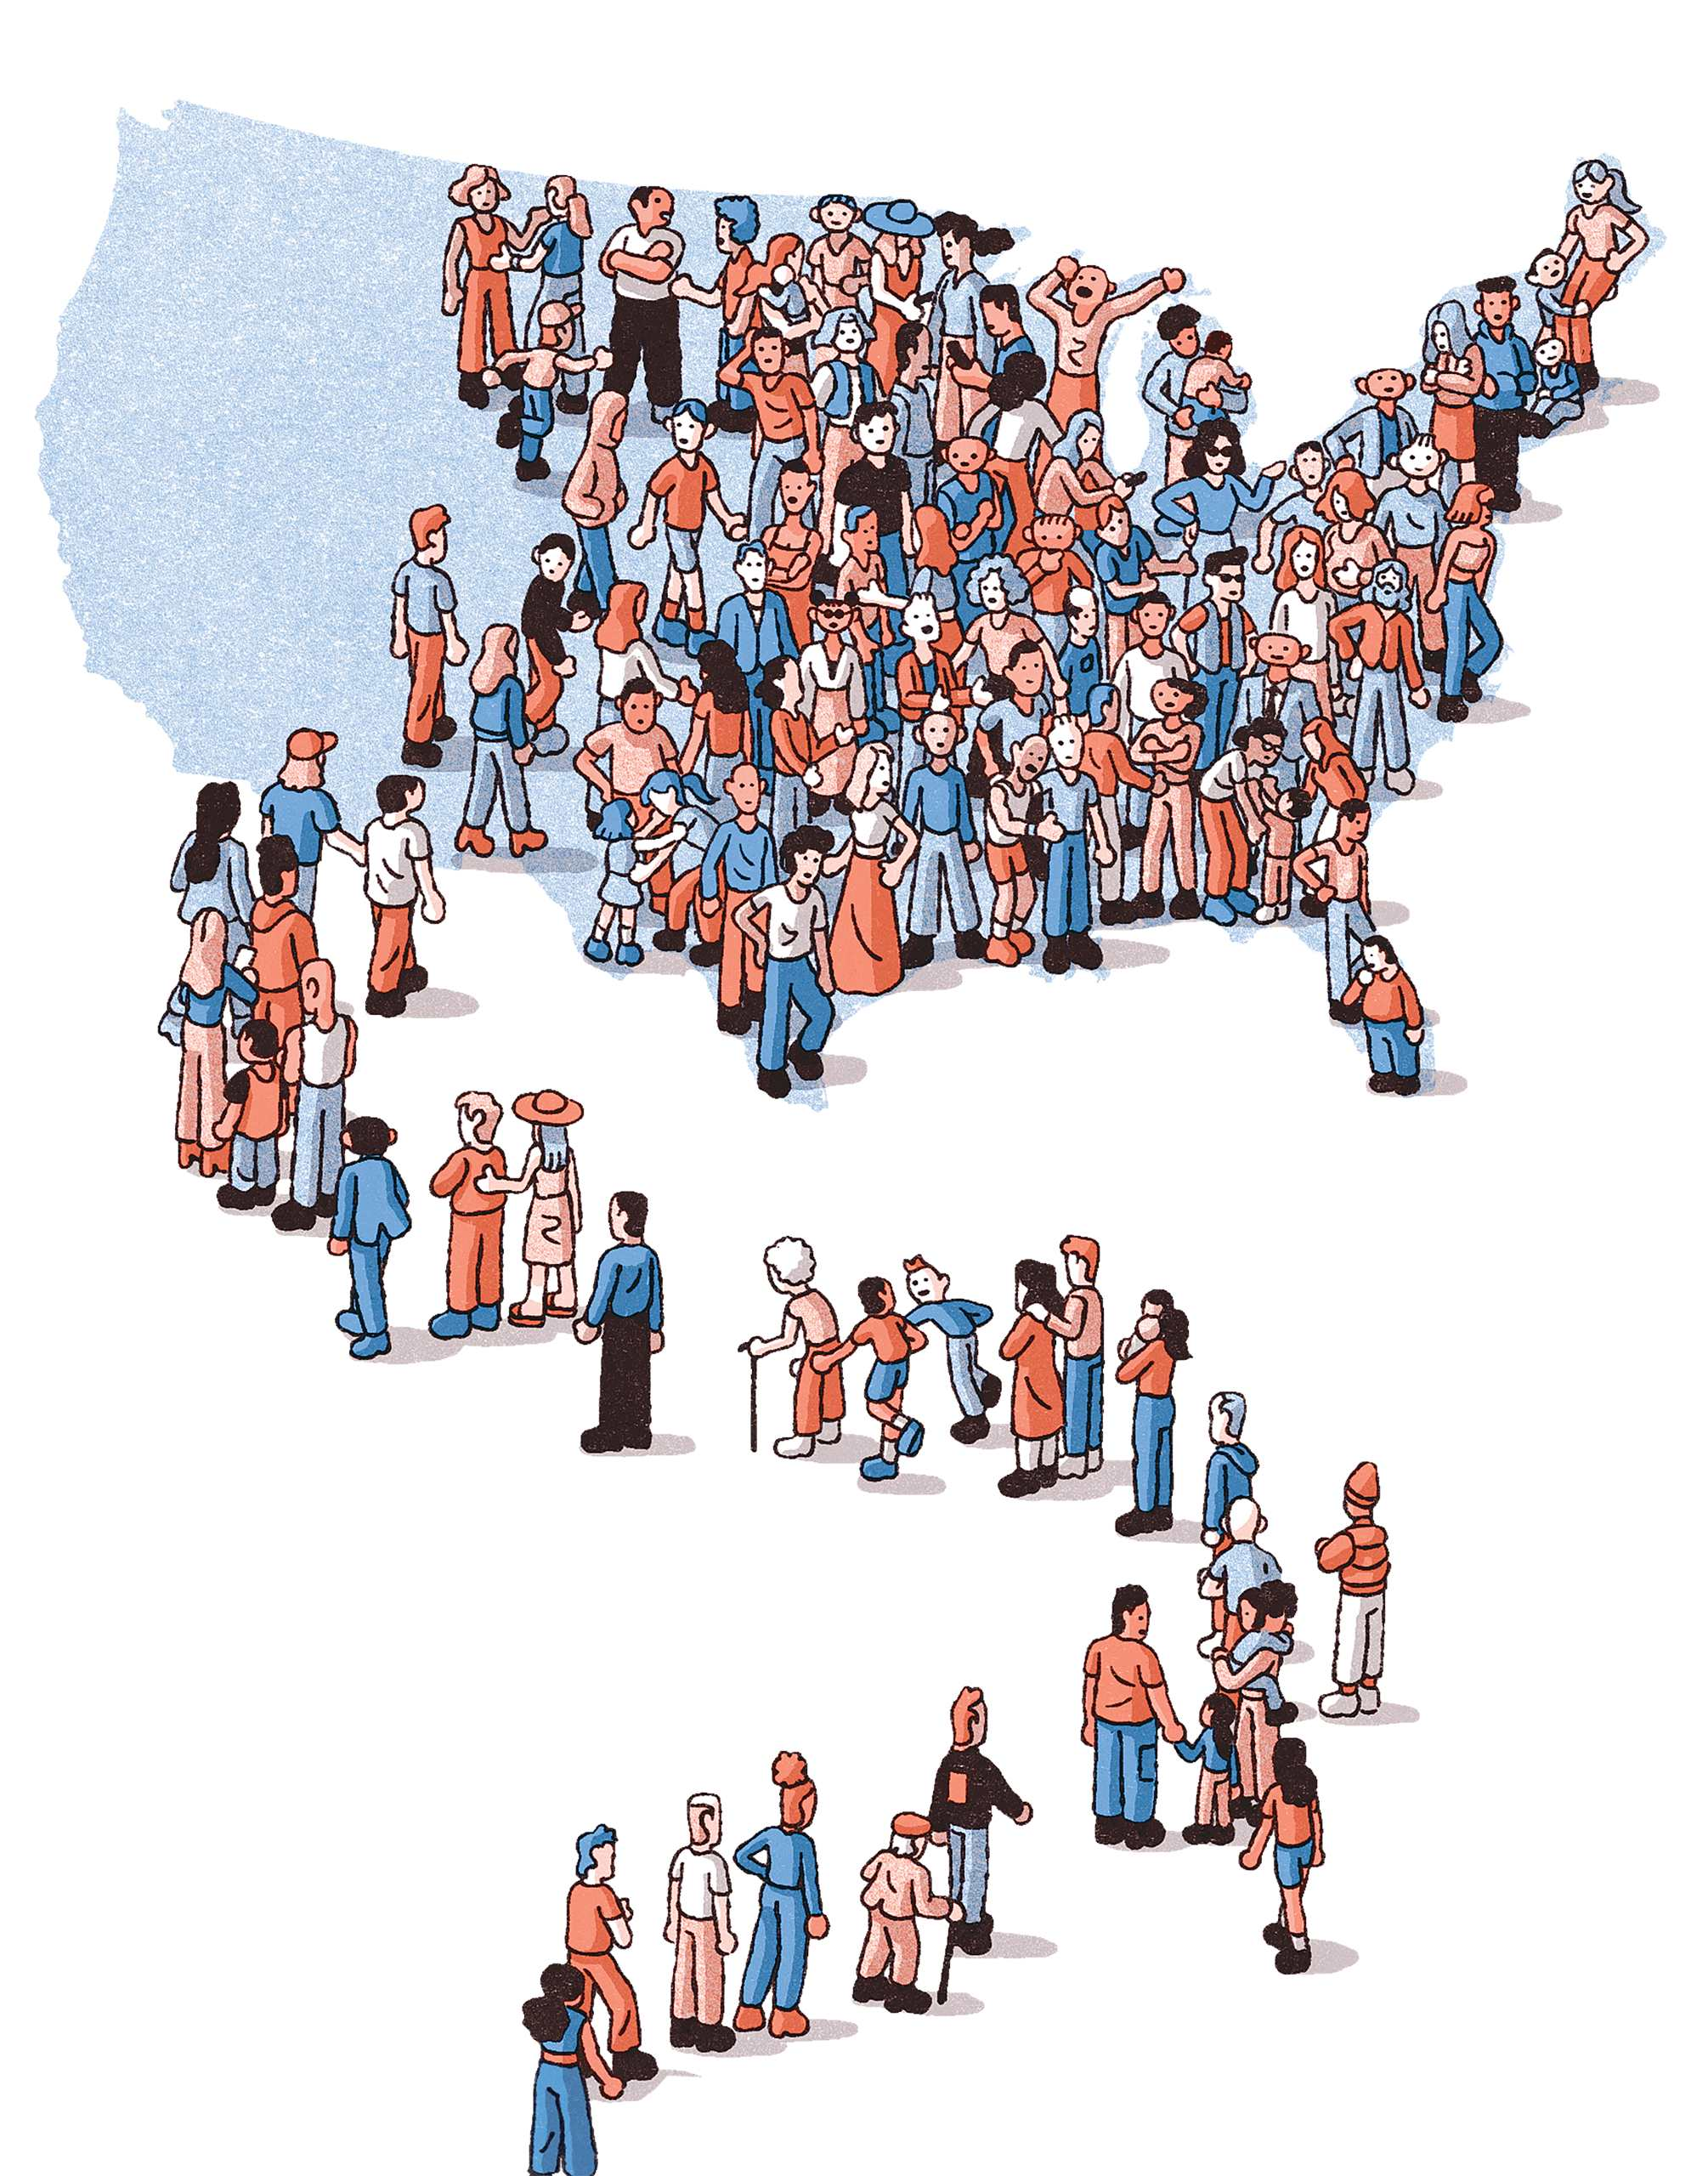
There are many variables to consider when doing a population census. This dataset contains the grouped and collected census data from the 1994 and 1995 population surveys conducted by the US Census Bureau.
### Objective
Your task is to build machine learning models to predict the income level (target variable) of the related collaborators in the evaluation set, being 0 a collaborator who has an income less than 50,000 USD annually, and 1 a collaborator who has an income equal to or greater than 50,000 USD annually.
### Evaluation Criteria
Submissions are evaluated using F1 Score. How do we do it? 



### About the dataset
This database contains 41 attributes. The target variable refers to the income level, being 0 a collaborator who has an income less than 50,000 USD annually, and 1 a collaborator who has an income equal to or greater than 50,000 USD annually.

To load the training data in your jupyter notebook, use the below command:

import pandas as pd

census_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Census_Income/Training_set_census.csv" )

#### Evaluation Dataset
Load the evaluation data (name it as census_eval). You can load the data using the below command.

census_eval = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Census_Income/Testing_set_census.csv')
Here the target column is deliberately not there as you need to predict it.

In [1]:
#libraries to use
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import  SelectFromModel


   age  class_of_worker  industry_code  occupation_code  \
0   23          Private             43               22   
1   24          Private             34                2   
2   38          Private             34                2   
3   33  Not in universe              0                0   
4   13  Not in universe              0                0   

                                education  wage_per_hour  \
0              Some college but no degree              0   
1              Bachelors degree(BA AB BS)              0   
2  Masters degree(MA MS MEng MEd MSW MBA)              0   
3                    High school graduate              0   
4                                Children              0   

  enrolled_in_edu_inst_lastwk                   marital_status  \
0       College or university                    Never married   
1             Not in universe                    Never married   
2             Not in universe  Married-civilian spouse present   
3             Not in

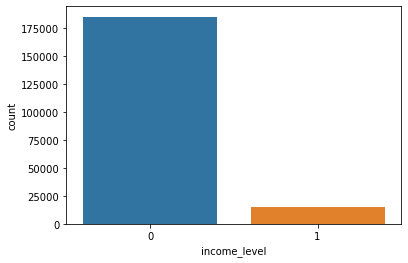

In [2]:
#data
pd.set_option('display.max_columns', None)
census_data_train = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Census_Income/Training_set_census.csv" )
census_data_holdout = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Census_Income/Testing_set_census.csv')
print(census_data_train.head())
out=census_data_train['income_level']
sns.countplot(x='income_level',data=census_data_train)

In [3]:
#information about data
print(census_data_train.info())
print(census_data_holdout.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 41 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   age                               200000 non-null  int64 
 1   class_of_worker                   200000 non-null  object
 2   industry_code                     200000 non-null  int64 
 3   occupation_code                   200000 non-null  int64 
 4   education                         200000 non-null  object
 5   wage_per_hour                     200000 non-null  int64 
 6   enrolled_in_edu_inst_lastwk       200000 non-null  object
 7   marital_status                    200000 non-null  object
 8   major_industry_code               200000 non-null  object
 9   major_occupation_code             200000 non-null  object
 10  race                              200000 non-null  object
 11  hispanic_origin                   199408 non-null  object
 12  se

In [4]:
#Removing the columnsn which has most null values
census_data_train.dropna(thresh=133338,axis=1,inplace=True)
census_data_holdout.dropna(thresh=33278,axis=1,inplace=True)

# Data Preprocessing

In [5]:
census_data_train['hispanic_origin'].value_counts(dropna=False)

All other                     115228
 All other                     57317
Mexican-American                5393
Mexican (Mexicano)              4756
 Mexican-American               2664
Central or South American       2606
 Mexican (Mexicano)             2401
Puerto Rican                    2171
Other Spanish                   1686
 Central or South American      1310
 Puerto Rican                   1049
 Other Spanish                   825
Cuban                            732
NaN                              592
 Cuban                           408
 NA                              263
Do not know                      196
Chicano                          192
 Chicano                         112
 Do not know                      99
Name: hispanic_origin, dtype: int64

In [6]:
census_data_train['hispanic_origin']=census_data_train['hispanic_origin'].str.lower().str.strip()
census_data_train['hispanic_origin']=census_data_train['hispanic_origin'].fillna(census_data_train['hispanic_origin'].mode().iloc[0])
census_data_holdout['hispanic_origin']=census_data_holdout['hispanic_origin'].str.lower().str.strip()
census_data_holdout['hispanic_origin']=census_data_holdout['hispanic_origin'].fillna(census_data_holdout['hispanic_origin'].mode().iloc[0])

In [7]:
census_data_train['state_of_previous_residence'].value_counts(dropna=False)

Not in universe     123002
 Not in universe     61297
California            1123
Utah                   724
 California            609
                     ...  
 South Carolina         32
 Delaware               28
Idaho                   24
 New Jersey             23
 Idaho                   8
Name: state_of_previous_residence, Length: 102, dtype: int64

In [8]:
census_data_train['state_of_previous_residence']=census_data_train['state_of_previous_residence'].str.lower().str.strip()
census_data_train['state_of_previous_residence']=census_data_train['state_of_previous_residence'].replace('?',np.nan)
census_data_train['state_of_previous_residence']=census_data_train['state_of_previous_residence'].fillna(census_data_train['state_of_previous_residence'].mode().iloc[0])

census_data_holdout['state_of_previous_residence']=census_data_holdout['state_of_previous_residence'].str.lower().str.strip()
census_data_holdout['state_of_previous_residence']=census_data_holdout['state_of_previous_residence'].replace('?',np.nan)
census_data_holdout['state_of_previous_residence']=census_data_holdout['state_of_previous_residence'].fillna(census_data_holdout['state_of_previous_residence'].mode().iloc[0])


In [9]:
census_data_holdout['country_father'].value_counts(dropna=False)

United-States          26560
 United-States         13389
Mexico                  1651
NaN                     1085
 Mexico                  849
                       ...  
 Laos                      8
 Hong Kong                 6
 Holand-Netherlands        4
 Panama                    4
Panama                     3
Name: country_father, Length: 86, dtype: int64

In [10]:
census_data_train['country_father']=census_data_train['country_father'].str.lower().str.strip()
census_data_train['country_father']=census_data_train['country_father'].replace('?',np.nan)
census_data_train['country_father']=census_data_train['country_father'].fillna(census_data_train['country_father'].mode().iloc[0])

census_data_holdout['country_father']=census_data_holdout['country_father'].str.lower().str.strip()
census_data_holdout['country_father']=census_data_holdout['country_father'].replace('?',np.nan)
census_data_holdout['country_father']=census_data_holdout['country_father'].fillna(census_data_holdout['country_father'].mode().iloc[0])




In [11]:
census_data_holdout['country_mother'].value_counts(dropna=False)

United-States          26705
 United-States         13511
Mexico                  1617
NaN                      985
 Mexico                  847
                       ...  
Trinadad&Tobago            8
Panama                     8
 Hong Kong                 5
 Panama                    4
 Holand-Netherlands        3
Name: country_mother, Length: 86, dtype: int64

In [12]:
census_data_train['country_mother']=census_data_train['country_mother'].str.lower().str.strip()
census_data_train['country_mother']=census_data_train['country_mother'].replace('?',np.nan)
census_data_train['country_mother']=census_data_train['country_mother'].fillna(census_data_train['country_mother'].mode().iloc[0])

census_data_holdout['country_mother']=census_data_holdout['country_mother'].str.lower().str.strip()
census_data_holdout['country_mother']=census_data_holdout['country_mother'].replace('?',np.nan)
census_data_holdout['country_mother']=census_data_holdout['country_mother'].fillna(census_data_holdout['country_mother'].mode().iloc[0])




In [13]:
census_data_holdout['country_self'].value_counts(dropna=False)



United-States          29450
 United-States         14939
Mexico                   967
NaN                      519
 Mexico                  490
                       ...  
Panama                     5
Holand-Netherlands         4
 Hungary                   3
 Panama                    1
 Holand-Netherlands        1
Name: country_self, Length: 86, dtype: int64

In [14]:
census_data_train['country_self']=census_data_train['country_self'].str.lower().str.strip()
census_data_train['country_self']=census_data_train['country_self'].replace('?',np.nan)
census_data_train['country_self']=census_data_train['country_self'].fillna(census_data_train['country_self'].mode().iloc[0])


census_data_holdout['country_self']=census_data_holdout['country_self'].str.lower().str.strip()
census_data_holdout['country_self']=census_data_holdout['country_self'].replace('?',np.nan)
census_data_holdout['country_self']=census_data_holdout['country_self'].fillna(census_data_holdout['country_self'].mode().iloc[0])


In [15]:
census_data_holdout.isnull().sum()


age                                 0
class_of_worker                     0
industry_code                       0
occupation_code                     0
education                           0
wage_per_hour                       0
enrolled_in_edu_inst_lastwk         0
marital_status                      0
major_industry_code                 0
major_occupation_code               0
race                                0
hispanic_origin                     0
sex                                 0
member_of_labor_union               0
reason_for_unemployment             0
full_parttime_employment_stat       0
capital_gains                       0
capital_losses                      0
dividend_from_Stocks                0
tax_filer_status                    0
region_of_previous_residence        0
state_of_previous_residence         0
d_household_family_stat             0
d_household_summary                 0
live_1_year_ago                     0
num_person_Worked_employer          0
family_membe

In [16]:
print(census_data_train.info())
print(census_data_holdout.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 37 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   age                               200000 non-null  int64 
 1   class_of_worker                   200000 non-null  object
 2   industry_code                     200000 non-null  int64 
 3   occupation_code                   200000 non-null  int64 
 4   education                         200000 non-null  object
 5   wage_per_hour                     200000 non-null  int64 
 6   enrolled_in_edu_inst_lastwk       200000 non-null  object
 7   marital_status                    200000 non-null  object
 8   major_industry_code               200000 non-null  object
 9   major_occupation_code             200000 non-null  object
 10  race                              200000 non-null  object
 11  hispanic_origin                   200000 non-null  object
 12  se

# Checking each column values to understand the categories for preprocessing

In [17]:
census_data_holdout['class_of_worker'].value_counts()

Not in universe                    16426
Private                            12123
 Not in universe                    8367
 Private                            6164
Self-employed-not incorporated      1381
Local government                    1298
 Self-employed-not incorporated      738
State government                     687
 Local government                    634
Self-employed-incorporated           604
Federal government                   520
 State government                    373
 Self-employed-incorporated          273
 Federal government                  257
Never worked                          81
Without pay                           36
 Never worked                         22
 Without pay                          16
Name: class_of_worker, dtype: int64

In [18]:
census_data_train['class_of_worker']=census_data_train['class_of_worker'].str.lower().str.strip()
census_data_holdout['class_of_worker']=census_data_holdout['class_of_worker'].str.lower().str.strip()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

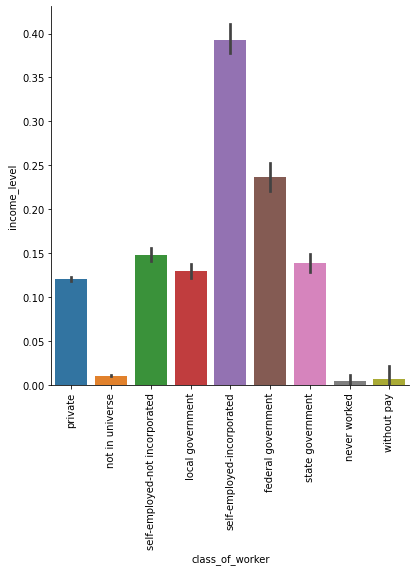

In [19]:
#Seeing the correlation using catlplot
sns.catplot(x='class_of_worker',y='income_level',data=census_data_train,kind='bar',height=6,legend=True,legend_out=True)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

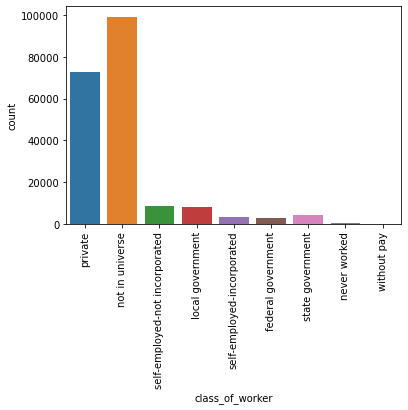

In [20]:
sns.countplot(x='class_of_worker',data=census_data_train)
plt.xticks(rotation=90)

In [21]:
census_data_holdout['education'].value_counts()

High school graduate                       8105
Children                                   7636
Some college but no degree                 4647
 High school graduate                      4061
 Children                                  3918
Bachelors degree(BA AB BS)                 3461
 Some college but no degree                2307
 Bachelors degree(BA AB BS)                1726
7th and 8th grade                          1275
10th grade                                 1260
Masters degree(MA MS MEng MEd MSW MBA)     1112
11th grade                                 1084
9th grade                                  1074
Associates degree-occup /vocational         878
 7th and 8th grade                          711
Associates degree-academic program          706
 10th grade                                 658
 Masters degree(MA MS MEng MEd MSW MBA)     598
 11th grade                                 588
5th or 6th grade                            554
 9th grade                              

In [22]:
census_data_train['education']=census_data_train['education'].str.lower().str.strip()
census_data_holdout['education']=census_data_holdout['education'].str.lower().str.strip()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

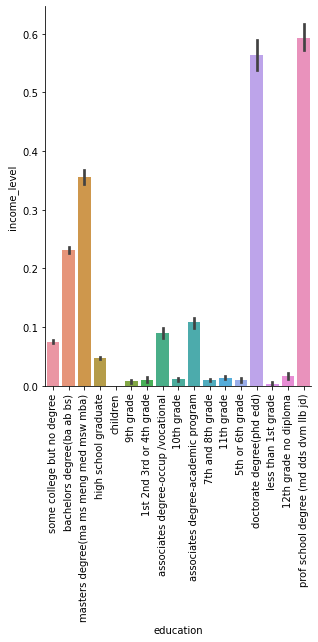

In [23]:
sns.catplot(x='education',y='income_level',data=census_data_train,kind='bar',height=6,legend=True,legend_out=True)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

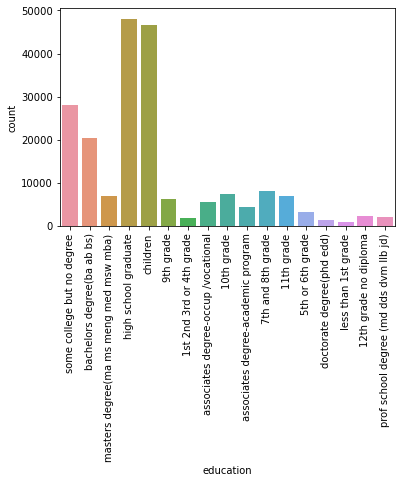

In [24]:
sns.countplot(x='education',data=census_data_train)
plt.xticks(rotation=90)

In [25]:
census_data_holdout['enrolled_in_edu_inst_lastwk'].value_counts()

Not in universe           31126
 Not in universe          15784
High school                1108
College or university       922
 High school                578
 College or university      482
Name: enrolled_in_edu_inst_lastwk, dtype: int64

In [26]:
census_data_train['enrolled_in_edu_inst_lastwk']=census_data_train['enrolled_in_edu_inst_lastwk'].str.lower().str.strip()
census_data_holdout['enrolled_in_edu_inst_lastwk']=census_data_holdout['enrolled_in_edu_inst_lastwk'].str.lower().str.strip()

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

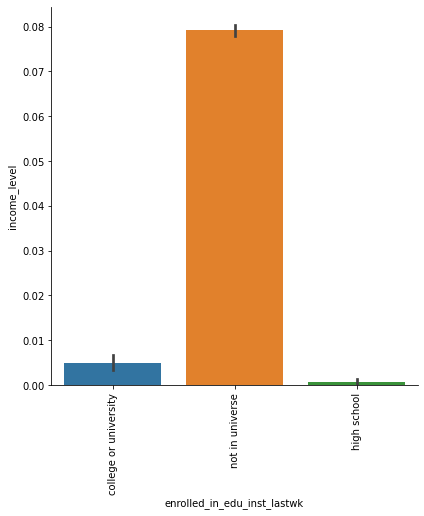

In [27]:
sns.catplot(x='enrolled_in_edu_inst_lastwk',y='income_level',data=census_data_train,kind='bar',height=6,legend=True,legend_out=True)
plt.xticks(rotation=90)

In [28]:
census_data_holdout['marital_status'].value_counts()

Married-civilian spouse present     14271
Never married                       14040
 Never married                       7268
 Married-civilian spouse present     7122
Divorced                             2138
Widowed                              1786
 Divorced                            1093
 Widowed                              886
Separated                             572
 Separated                            278
Married-spouse absent                 250
 Married-spouse absent                130
Married-A F spouse present             99
 Married-A F spouse present            67
Name: marital_status, dtype: int64

In [29]:
census_data_train['marital_status']=census_data_train['marital_status'].str.lower().str.strip()
census_data_holdout['marital_status']=census_data_holdout['marital_status'].str.lower().str.strip()
#census_data_train['marital_status'].replace('married-a f spouse present','married-civilian spouse present',inplace=True)
#census_data_holdout['marital_status'].replace('married-a f spouse present','married-civilian spouse present',inplace=True)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

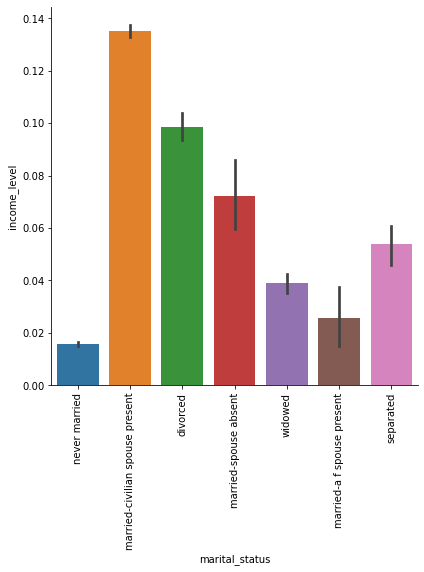

In [30]:
sns.catplot(x='marital_status',y='income_level',data=census_data_train,kind='bar',height=6,legend=True,legend_out=True)
plt.xticks(rotation=90)

In [31]:
census_data_holdout['major_industry_code'].value_counts()

Not in universe or children             16507
 Not in universe or children             8389
Retail trade                             2891
Manufacturing-durable goods              1536
 Retail trade                            1496
Education                                1391
Manufacturing-nondurable goods           1162
Construction                              999
Finance insurance and real estate         998
Business and repair services              987
Public administration                     780
Medical except hospital                   763
 Manufacturing-durable goods              762
Other professional services               739
Transportation                            723
 Education                                713
Hospital services                         648
 Manufacturing-nondurable goods           597
Wholesale trade                           584
 Business and repair services             537
Agriculture                               528
 Construction                     

In [32]:
census_data_train['major_industry_code']=census_data_train['major_industry_code'].str.lower().str.strip()
census_data_holdout['major_industry_code']=census_data_holdout['major_industry_code'].str.lower().str.strip()

In [33]:
census_data_holdout['major_occupation_code'].value_counts()

Not in universe                           16507
 Not in universe                           8389
Adm support including clerical             2419
Professional specialty                     2377
Executive admin and managerial             2161
Sales                                      2026
Other service                              1969
Precision production craft & repair        1804
 Professional specialty                    1227
 Adm support including clerical            1195
 Executive admin and managerial            1104
Machine operators assmblrs & inspctrs      1085
 Sales                                     1055
 Other service                              980
 Precision production craft & repair        929
Transportation and material moving          686
Handlers equip cleaners etc                 636
 Machine operators assmblrs & inspctrs      567
Farming forestry and fishing                546
Technicians and related support             510
 Handlers equip cleaners etc            

In [34]:
census_data_train['major_occupation_code']=census_data_train['major_occupation_code'].str.lower().str.strip()
census_data_holdout['major_occupation_code']=census_data_holdout['major_occupation_code'].str.lower().str.strip()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

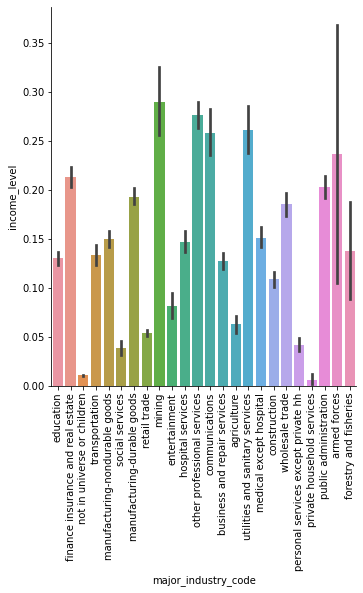

In [35]:
sns.catplot(x='major_industry_code',y='income_level',data=census_data_train,kind='bar',height=6,legend=True,legend_out=True)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

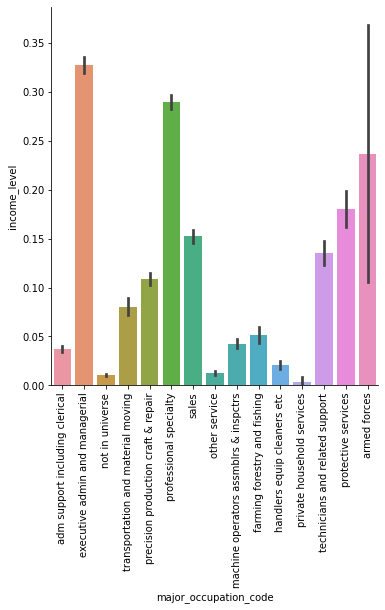

In [36]:
sns.catplot(x='major_occupation_code',y='income_level',data=census_data_train,kind='bar',height=6,legend=True,legend_out=True)
plt.xticks(rotation=90)

In [37]:
census_data_holdout['race'].value_counts()

White                           27904
 White                          14155
Black                            3339
 Black                           1722
Asian or Pacific Islander         974
Other                             593
 Asian or Pacific Islander        469
Amer Indian Aleut or Eskimo       346
 Other                            307
 Amer Indian Aleut or Eskimo      191
Name: race, dtype: int64

In [38]:
census_data_train['race']=census_data_train['race'].str.lower().str.strip()
census_data_holdout['race']=census_data_holdout['race'].str.lower().str.strip()

In [39]:
census_data_holdout['sex'].value_counts()

Female     17214
Male       15942
 Female     8692
 Male       8152
Name: sex, dtype: int64

In [40]:
census_data_train['sex']=census_data_train['sex'].str.lower().str.strip()
census_data_holdout['sex']=census_data_holdout['sex'].str.lower().str.strip()

In [41]:
census_data_train['hispanic_origin'].value_counts()

all other                    173137
mexican-american               8057
mexican (mexicano)             7157
central or south american      3916
puerto rican                   3220
other spanish                  2511
cuban                          1140
chicano                         304
do not know                     295
na                              263
Name: hispanic_origin, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

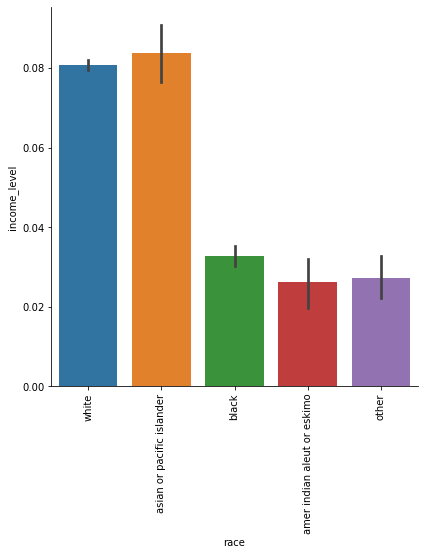

In [42]:
sns.catplot(x='race',y='income_level',data=census_data_train,kind='bar',height=6,legend=True,legend_out=True)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

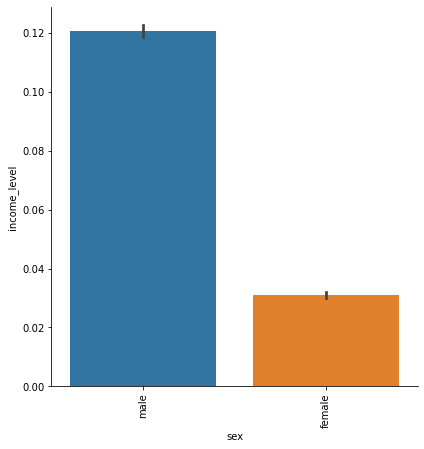

In [43]:
sns.catplot(x='sex',y='income_level',data=census_data_train,kind='bar',height=6,legend=True,legend_out=True)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

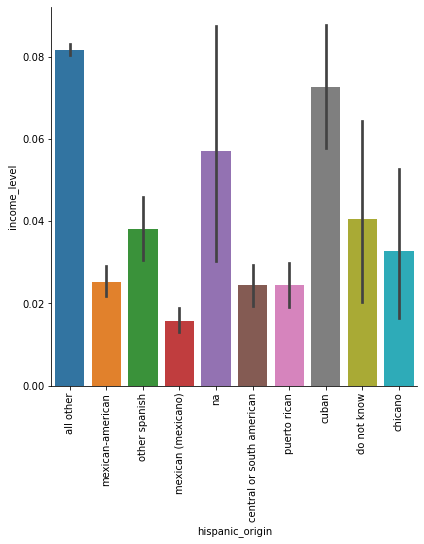

In [44]:
sns.catplot(x='hispanic_origin',y='income_level',data=census_data_train,kind='bar',height=6,legend=True,legend_out=True)
plt.xticks(rotation=90)

In [45]:
census_data_holdout['member_of_labor_union'].value_counts()

Not in universe     29924
 Not in universe    15182
No                   2684
 No                  1408
Yes                   548
 Yes                  254
Name: member_of_labor_union, dtype: int64

In [46]:
census_data_train['member_of_labor_union']=census_data_train['member_of_labor_union'].str.lower().str.strip()
census_data_holdout['member_of_labor_union']=census_data_holdout['member_of_labor_union'].str.lower().str.strip()

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

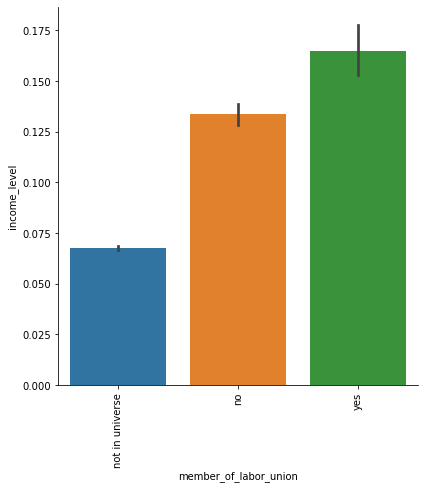

In [47]:
sns.catplot(x='member_of_labor_union',y='income_level',data=census_data_train,kind='bar',height=6,legend=True,legend_out=True)
plt.xticks(rotation=90)

In [48]:
grouped = census_data_train.groupby("member_of_labor_union").aggregate(np.mean)
grouped['income_level']

member_of_labor_union
no                 0.133469
not in universe    0.067567
yes                0.164831
Name: income_level, dtype: float64

In [49]:
census_data_train['reason_for_unemployment'].value_counts()

Not in universe           129540
 Not in universe           64354
Other job loser             1367
Re-entrant                  1323
 Other job loser             746
 Re-entrant                  672
Job loser - on layoff        646
Job leaver                   398
 Job loser - on layoff       343
New entrant                  278
 Job leaver                  185
 New entrant                 148
Name: reason_for_unemployment, dtype: int64

In [50]:
census_data_train['reason_for_unemployment']=census_data_train['reason_for_unemployment'].str.lower().str.strip()
census_data_holdout['reason_for_unemployment']=census_data_holdout['reason_for_unemployment'].str.lower().str.strip()

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

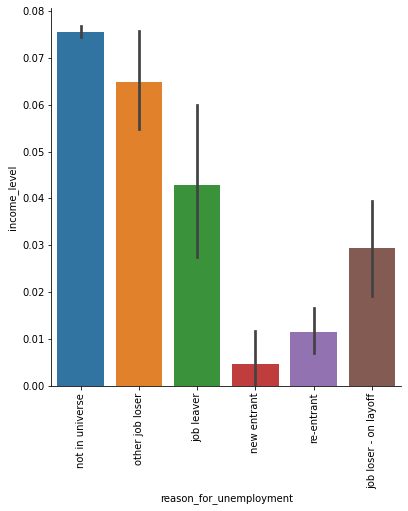

In [51]:
sns.catplot(x='reason_for_unemployment',y='income_level',data=census_data_train,kind='bar',height=6,legend=True,legend_out=True)
plt.xticks(rotation=90)

In [52]:
census_data_holdout['full_parttime_employment_stat'].value_counts()

Children or Armed Forces               20376
 Children or Armed Forces              10301
Full-time schedules                     6897
Not in labor force                      4479
 Full-time schedules                    3577
 Not in labor force                     2282
PT for non-econ reasons usually FT       550
Unemployed full-time                     383
 PT for non-econ reasons usually FT      282
PT for econ reasons usually PT           221
 Unemployed full-time                    202
Unemployed part- time                    151
PT for econ reasons usually FT            99
 PT for econ reasons usually PT           88
 Unemployed part- time                    65
 PT for econ reasons usually FT           47
Name: full_parttime_employment_stat, dtype: int64

In [53]:
census_data_train['full_parttime_employment_stat']=census_data_train['full_parttime_employment_stat'].str.lower().str.strip()
census_data_holdout['full_parttime_employment_stat']=census_data_holdout['full_parttime_employment_stat'].str.lower().str.strip()

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

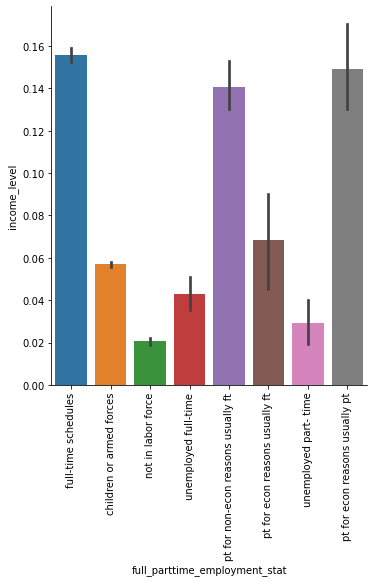

In [54]:
sns.catplot(x='full_parttime_employment_stat',y='income_level',data=census_data_train,kind='bar',height=6,legend=True,legend_out=True)
plt.xticks(rotation=90)

In [55]:
census_data_holdout['region_of_previous_residence'].value_counts()

Not in universe     30628
 Not in universe    15556
South                 771
West                  649
Midwest               568
Northeast             459
 South                406
 West                 328
 Midwest              308
 Northeast            215
Abroad                 81
 Abroad                31
Name: region_of_previous_residence, dtype: int64

In [56]:
census_data_train['region_of_previous_residence']=census_data_train['region_of_previous_residence'].str.lower().str.strip()
census_data_holdout['region_of_previous_residence']=census_data_holdout['region_of_previous_residence'].str.lower().str.strip()

In [57]:
census_data_train['state_of_previous_residence'].value_counts()

not in universe         184991
california                1732
utah                      1080
florida                    861
north carolina             834
oklahoma                   610
abroad                     606
minnesota                  572
indiana                    548
north dakota               488
new mexico                 466
michigan                   425
alaska                     299
new hampshire              258
arizona                    257
kentucky                   256
colorado                   238
oregon                     229
georgia                    225
west virginia              221
montana                    220
wyoming                    220
alabama                    219
new york                   219
arkansas                   212
vermont                    205
louisiana                  202
ohio                       202
pennsylvania               201
tennessee                  200
texas                      197
nebraska                   187
mississi

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

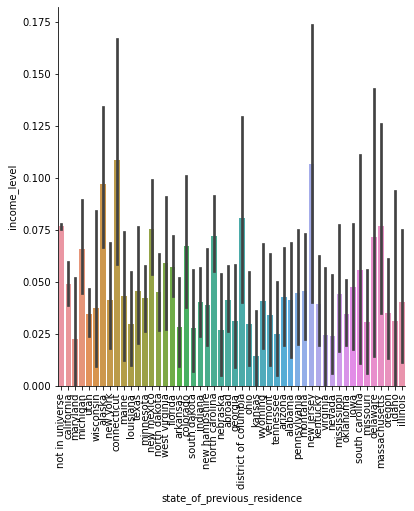

In [58]:

sns.catplot(x='state_of_previous_residence',y='income_level',data=census_data_train,kind='bar',height=6,legend=True,legend_out=True);
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

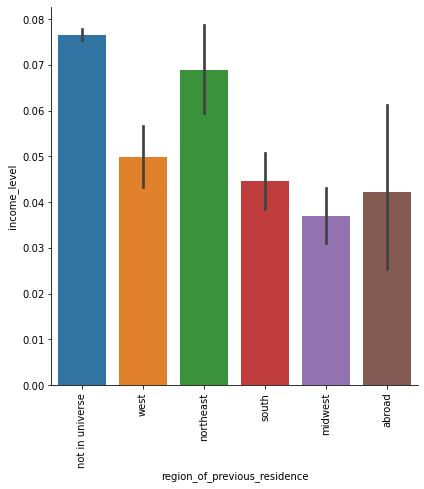

In [59]:
sns.catplot(x='region_of_previous_residence',y='income_level',data=census_data_train,kind='bar',height=6,legend=True,legend_out=True)
plt.xticks(rotation=90)

In [60]:
pd.set_option('display.max_rows', None)
census_data_train['d_household_family_stat'].value_counts().sort_index()

 Child 18+ ever marr Not in a subfamily               316
 Child 18+ ever marr RP of subfamily                  235
 Child 18+ never marr Not in a subfamily             4070
 Child 18+ never marr RP of subfamily                 199
 Child 18+ spouse of subfamily RP                      57
 Child <18 ever marr RP of subfamily                    5
 Child <18 ever marr not in subfamily                   8
 Child <18 never marr RP of subfamily                  21
 Child <18 never marr not in subfamily              16327
 Child <18 spouse of subfamily RP                       1
 Child under 18 of RP of unrel subfamily              231
 Grandchild 18+ ever marr RP of subfamily               6
 Grandchild 18+ ever marr not in subfamily             10
 Grandchild 18+ never marr RP of subfamily              1
 Grandchild 18+ never marr not in subfamily           130
 Grandchild 18+ spouse of subfamily RP                  4
 Grandchild <18 never marr RP of subfamily              1
 Grandchild <1

In [61]:
census_data_train['d_household_family_stat']=census_data_train['d_household_family_stat'].str.lower().str.strip()
census_data_holdout['d_household_family_stat']=census_data_holdout['d_household_family_stat'].str.lower().str.strip()
census_data_holdout['d_household_family_stat']=census_data_holdout['d_household_family_stat'].replace(
    'grandchild <18 ever marr not in subfamily','grandchild <18 never marr not in subfamily')

In [62]:
census_data_holdout['d_household_summary'].value_counts().sort_index()

 Child 18 or older                        1203
 Child under 18 ever married                 4
 Child under 18 never married             4226
 Group Quarters- Secondary individual       10
 Householder                              6484
 Nonrelative of householder                681
 Other relative of householder             772
 Spouse of householder                    3464
Child 18 or older                         2383
Child under 18 ever married                 10
Child under 18 never married              8101
Group Quarters- Secondary individual        23
Householder                              12701
Nonrelative of householder                1303
Other relative of householder             1658
Spouse of householder                     6977
Name: d_household_summary, dtype: int64

In [63]:
census_data_train['d_household_summary']=census_data_train['d_household_summary'].str.lower().str.strip()
census_data_holdout['d_household_summary']=census_data_holdout['d_household_summary'].str.lower().str.strip()

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

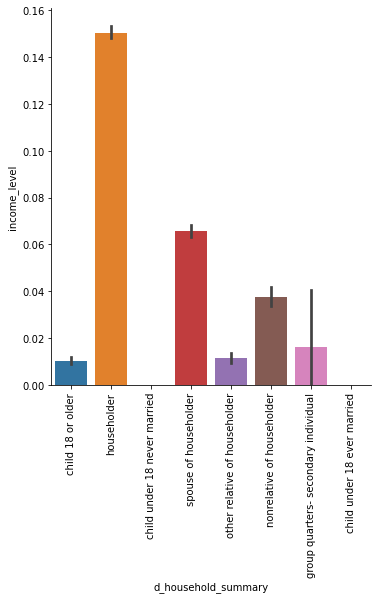

In [64]:
sns.catplot(x='d_household_summary',y='income_level',data=census_data_train,kind='bar',height=6,legend=True,legend_out=True)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 <a list of 37 Text major ticklabel objects>)

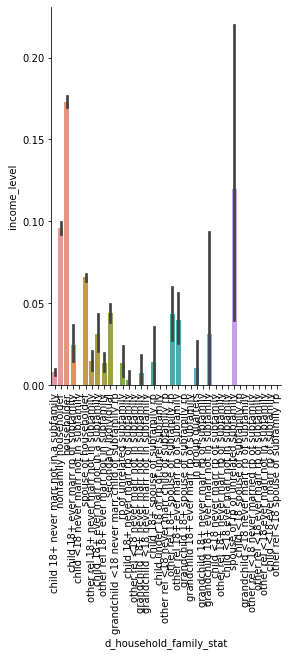

In [65]:

sns.catplot(x='d_household_family_stat',y='income_level',data=census_data_train,kind='bar',height=6,legend=True,legend_out=True)

plt.xticks(rotation=90)

In [66]:
census_data_holdout['tax_filer_status'].value_counts()

Nonfiler                         12226
Joint both under 65              11361
Single                            6281
 Nonfiler                         6270
 Joint both under 65              5739
 Single                           3163
Joint both 65+                    1415
Head of household                 1207
 Joint both 65+                    722
Joint one under 65 & one 65+       666
 Head of household                 635
 Joint one under 65 & one 65+      315
Name: tax_filer_status, dtype: int64

In [67]:
census_data_train['tax_filer_status']=census_data_train['tax_filer_status'].str.lower().str.strip()
census_data_holdout['tax_filer_status']=census_data_holdout['tax_filer_status'].str.lower().str.strip()

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

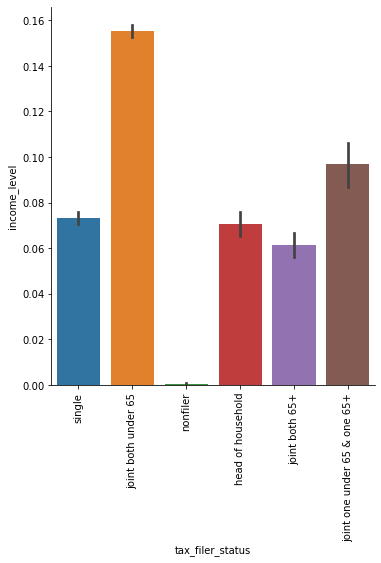

In [68]:
sns.catplot(x='tax_filer_status',y='income_level',data=census_data_train,kind='bar',height=6,legend=True,legend_out=True)
plt.xticks(rotation=90)

In [69]:
census_data_train['live_1_year_ago'].value_counts()

Not in universe under 1 year old     67692
Yes                                  55310
 Not in universe under 1 year old    33773
 Yes                                 27524
No                                   10550
 No                                   5151
Name: live_1_year_ago, dtype: int64

In [70]:
census_data_train['live_1_year_ago']=census_data_train['live_1_year_ago'].str.lower().str.strip()
census_data_holdout['live_1_year_ago']=census_data_holdout['live_1_year_ago'].str.lower().str.strip()

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

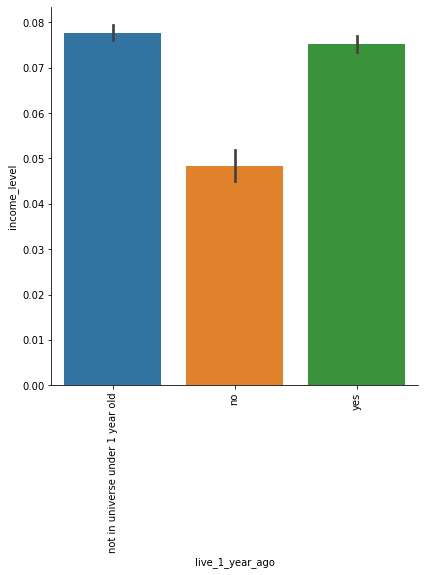

In [71]:
sns.catplot(x='live_1_year_ago',y='income_level',data=census_data_train,kind='bar',height=6,legend=True,legend_out=True)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text major ticklabel objects>)

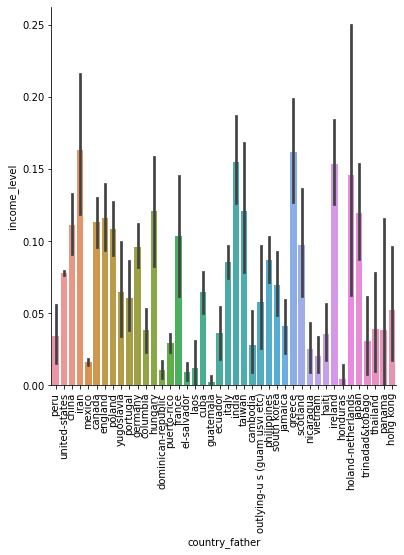

In [72]:
sns.catplot(x='country_father',y='income_level',data=census_data_train,kind='bar',height=6,legend=True,legend_out=True)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text major ticklabel objects>)

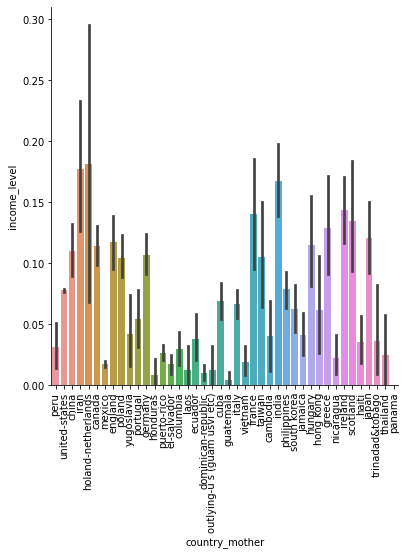

In [73]:
sns.catplot(x='country_mother',y='income_level',data=census_data_train,kind='bar',height=6,legend=True,legend_out=True)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text major ticklabel objects>)

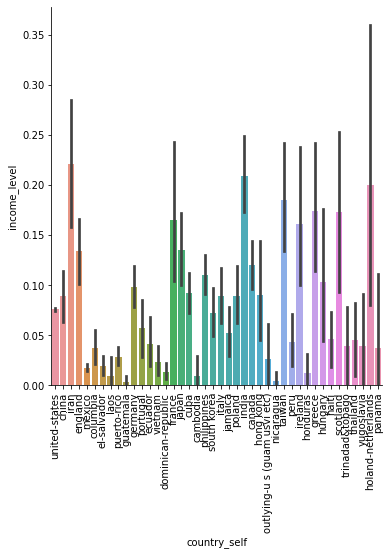

In [74]:
sns.catplot(x='country_self',y='income_level',data=census_data_train,kind='bar',height=6,legend=True,legend_out=True)
plt.xticks(rotation=90)

In [75]:
census_data_holdout['citizenship'].value_counts()

Native- Born in the United States               29451
 Native- Born in the United States              14940
Foreign born- Not a citizen of U S               2202
 Foreign born- Not a citizen of U S              1090
Foreign born- U S citizen by naturalization       956
 Foreign born- U S citizen by naturalization      536
Native- Born abroad of American Parent(s)         306
Native- Born in Puerto Rico or U S Outlying       241
 Native- Born abroad of American Parent(s)        151
 Native- Born in Puerto Rico or U S Outlying      127
Name: citizenship, dtype: int64

In [76]:
census_data_train['citizenship']=census_data_train['citizenship'].str.lower().str.strip()
census_data_holdout['citizenship']=census_data_holdout['citizenship'].str.lower().str.strip()



In [77]:
census_data_holdout['family_members_under_18'].value_counts()

Not in universe            24225
 Not in universe           12246
Both parents present        6249
 Both parents present       3259
Mother only present         2077
 Mother only present        1062
Father only present          320
Neither parent present       285
 Father only present         160
 Neither parent present      117
Name: family_members_under_18, dtype: int64

In [78]:
census_data_train['family_members_under_18']=census_data_train['family_members_under_18'].str.lower().str.strip()
census_data_holdout['family_members_under_18']=census_data_holdout['family_members_under_18'].str.lower().str.strip()

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

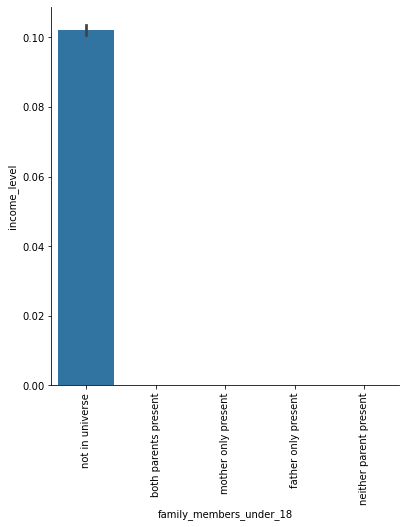

In [79]:
sns.catplot(x='family_members_under_18',y='income_level',data=census_data_train,kind='bar',height=6,legend=True,legend_out=True)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

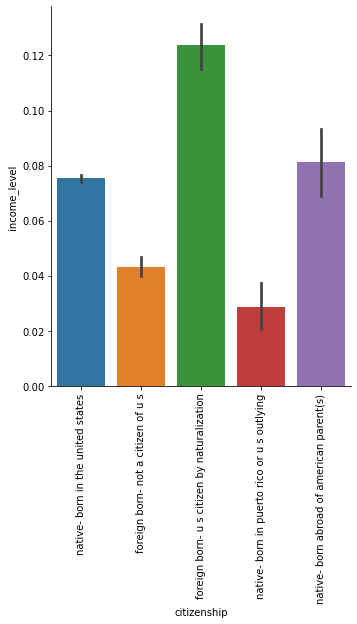

In [80]:
sns.catplot(x='citizenship',y='income_level',data=census_data_train,kind='bar',height=6,legend=True,legend_out=True)
plt.xticks(rotation=90)

In [81]:
# census_data_train.drop(['country_self','family_members_under_18'],axis=1,inplace=True)
# census_data_holdout.drop(['country_self','family_members_under_18'],axis=1,inplace=True)

In [82]:
census_data_holdout['fill_questionnaire_veteran_admin'].value_counts()

Not in universe     32828
 Not in universe    16673
No                    268
 No                   129
Yes                    60
 Yes                   42
Name: fill_questionnaire_veteran_admin, dtype: int64

In [83]:
census_data_train['fill_questionnaire_veteran_admin']=census_data_train['fill_questionnaire_veteran_admin'].str.lower().str.strip()
census_data_holdout['fill_questionnaire_veteran_admin']=census_data_holdout['fill_questionnaire_veteran_admin'].str.lower().str.strip()

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

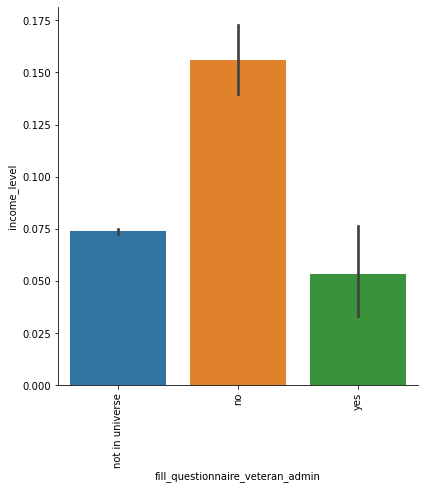

In [84]:
sns.catplot(x='fill_questionnaire_veteran_admin',y='income_level',data=census_data_train,kind='bar',height=6,legend=True,legend_out=True)
plt.xticks(rotation=90)

In [85]:
census_data_train.describe(include=["int64"])

age  industry_code  occupation_code  wage_per_hour  \
count  200000.000000  200000.000000    200000.000000  200000.000000   
mean       34.662495      15.564830        11.326325      54.835700   
std        22.225765      18.104961        14.424809     272.034681   
min         0.000000       0.000000         0.000000       0.000000   
25%        16.000000       0.000000         0.000000       0.000000   
50%        33.000000       1.000000         1.000000       0.000000   
75%        50.000000      33.000000        26.000000       0.000000   
max        90.000000      51.000000        46.000000    9999.000000   

       capital_gains  capital_losses  dividend_from_Stocks  \
count  200000.000000   200000.000000         200000.000000   
mean      493.561580       38.921275            212.977630   
std      5109.900136      277.867944           2062.591247   
min         0.000000        0.000000              0.000000   
25%         0.000000        0.000000              0.000000   
50%         0.000000        0.000000              0.000000   
75%         0.000000        0.000000              0.000000   
max     99999.000000     4608.000000          99999.000000   

       num_person_Worked_employer  business_or_self_employed  \
count               200000.000000              200000.000000   
mean                     1.983780                   0.177995   
std                      2.372892                   0.557014   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      1.000000                   0.000000   
75%                      4.000000                   0.000000   
max                      6.000000                   2.000000   

       veterans_benefits  weeks_worked_in_year           year   income_level  
count      200000.000000         200000.000000  200000.000000  200000.000000  
mean            1.522860             23.541820      94.499800       0.074360  
std             0.846346             24.447497       0.500001       0.262357  
min             0.000000              0.000000      94.000000       0.000000  
25%             2.000000              0.000000      94.000000       0.000000  
50%             2.000000             10.000000      94.000000       0.000000  
75%             2.000000             52.000000      95.000000       0.000000  
max             2.000000             52.000000      95.000000       1.000000

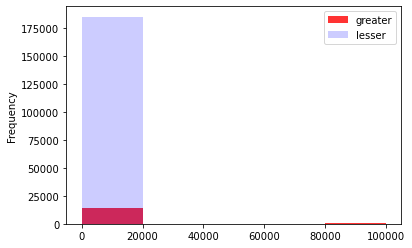

In [86]:
income_greater=census_data_train[census_data_train['income_level']==1]
income_lesser=census_data_train[census_data_train['income_level']==0]
income_greater['capital_gains'].plot.hist(alpha=0.8,color='Red',bins=5)
income_lesser['capital_gains'].plot.hist(alpha=0.2,color='Blue',bins=5)
plt.legend(['greater','lesser'])

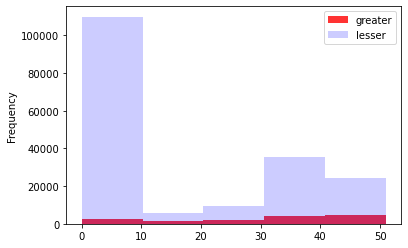

In [87]:
income_greater=census_data_train[census_data_train['income_level']==1]
income_lesser=census_data_train[census_data_train['income_level']==0]
income_greater['industry_code'].plot.hist(alpha=0.8,color='Red',bins=5)
income_lesser['industry_code'].plot.hist(alpha=0.2,color='Blue',bins=5)
plt.legend(['greater','lesser'])

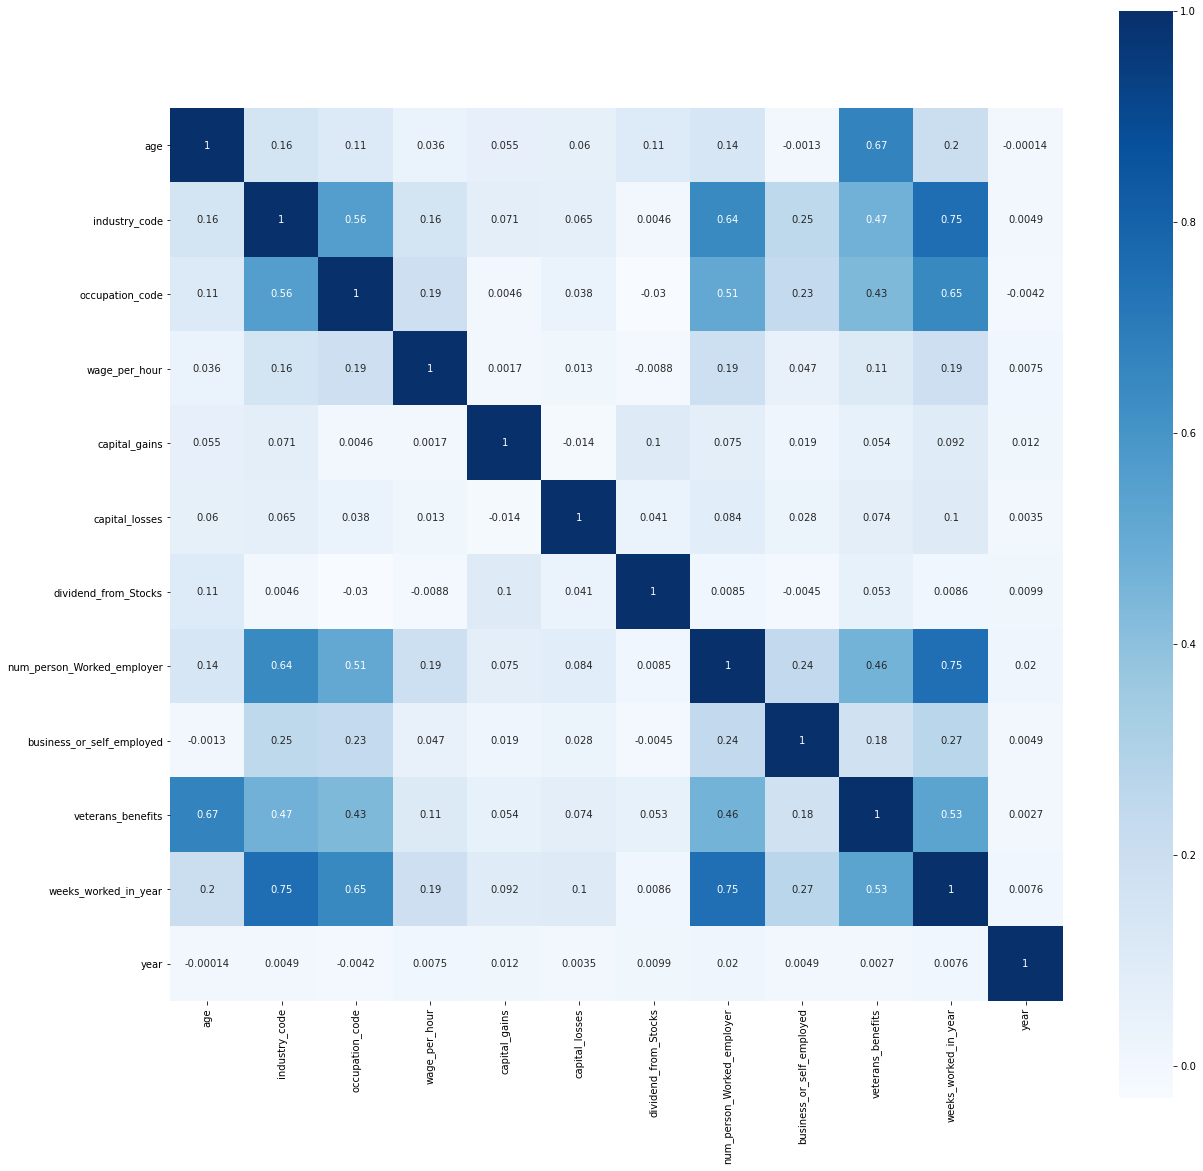

In [88]:
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(census_data_holdout.corr(),cmap='Blues',square=True,xticklabels='auto',annot=True)

In [89]:
# census_data_train.drop(['occupation_code','num_person_Worked_employer','weeks_worked_in_year'],axis=1,inplace=True)
# census_data_holdout.drop(['occupation_code','num_person_Worked_employer','weeks_worked_in_year'],axis=1,inplace=True)

In [90]:
census_data_train.info()
census_data_holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 37 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   age                               200000 non-null  int64 
 1   class_of_worker                   200000 non-null  object
 2   industry_code                     200000 non-null  int64 
 3   occupation_code                   200000 non-null  int64 
 4   education                         200000 non-null  object
 5   wage_per_hour                     200000 non-null  int64 
 6   enrolled_in_edu_inst_lastwk       200000 non-null  object
 7   marital_status                    200000 non-null  object
 8   major_industry_code               200000 non-null  object
 9   major_occupation_code             200000 non-null  object
 10  race                              200000 non-null  object
 11  hispanic_origin                   200000 non-null  object
 12  se

In [91]:
# from sklearn import preprocessing
# Categories=census_data_train.select_dtypes(include=['object']).columns
# for feature in Categories:
#         le = preprocessing.LabelEncoder()
#         census_data_train[feature] = le.fit_transform(census_data_train[feature])
#         census_data_holdout[feature] = le.transform(census_data_holdout[feature])

In [92]:
def create_dummies(df,column_name):
    dummies=pd.get_dummies(df[column_name],prefix=column_name)
    df=pd.concat([df,dummies],axis=1)
    del df[column_name]
    return df
for col in census_data_train.select_dtypes(include=['object']).columns:
    census_data_train=create_dummies(census_data_train,col)
    census_data_holdout=create_dummies(census_data_holdout,col)

In [93]:
census_data_train.head()

age  industry_code  occupation_code  wage_per_hour  capital_gains  \
0   23             43               22              0              0   
1   24             34                2              0              0   
2   38             34                2              0              0   
3   33              0                0              0              0   
4   13              0                0              0              0   

   capital_losses  dividend_from_Stocks  num_person_Worked_employer  \
0               0                     0                           4   
1               0                     0                           4   
2               0                   250                           4   
3               0                     0                           0   
4               0                     0                           0   

   business_or_self_employed  veterans_benefits  weeks_worked_in_year  year  \
0                          0                  2                    30    95   
1                          0                  2                    26    94   
2                          0                  2                    52    94   
3                          0                  2                     0    95   
4                          0                  0                     0    95   

   income_level  class_of_worker_federal government  \
0             0                                   0   
1             0                                   0   
2             1                                   0   
3             0                                   0   
4             0                                   0   

   class_of_worker_local government  class_of_worker_never worked  \
0                                 0                             0   
1                                 0                             0   
2                                 0                             0   
3                                 0                             0   
4                                 0                             0   

   class_of_worker_not in universe  class_of_worker_private  \
0                                0                        1   
1                                0                        1   
2                                0                        1   
3                                1                        0   
4                                1                        0   

   class_of_worker_self-employed-incorporated  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   class_of_worker_self-employed-not incorporated  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   class_of_worker_state government  class_of_worker_without pay  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   education_10th grade  education_11th grade  \
0                     0                     0   
1                     0                     0   
2                     0                     0   
3                     0                     0   
4                     0                     0   

   education_12th grade no diploma  education_1st 2nd 3rd or 4th grade  \
0                                0                                   0   
1                                0                                   0   
2  

In [94]:
X=census_data_train.drop(columns=['income_level'])
Y=census_data_train.income_level
print(X.shape)


(200000, 370)


In [95]:
print(Y.shape)

(200000,)


In [96]:
#census_data_holdout['d_household_family_stat_grandchild <18 never marr rp of subfamily']
#census_data_holdout['d_household_family_stat_other rel <18 spouse of subfamily rp']
#census_data_holdout['d_household_family_stat_other rel <18 ever marr not in subfamily']


In [97]:
X=X.drop(columns=['d_household_family_stat_grandchild <18 never marr rp of subfamily',
               'd_household_family_stat_other rel <18 spouse of subfamily rp',
              'd_household_family_stat_other rel <18 ever marr not in subfamily'])

In [98]:
print(census_data_holdout.shape)

(50000, 367)


In [99]:
X.shape

(200000, 367)

In [100]:
census_data_holdout.columns==X.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [101]:

scaler = StandardScaler()

X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
census_data_holdout=pd.DataFrame(scaler.fit_transform(census_data_holdout),columns=census_data_holdout.columns)


In [102]:
X.head()

age  industry_code  occupation_code  wage_per_hour  capital_gains  \
0 -0.524730       1.515344         0.739954      -0.201577       -0.09659   
1 -0.479737       1.018241        -0.646549      -0.201577       -0.09659   
2  0.150164       1.018241        -0.646549      -0.201577       -0.09659   
3 -0.074801      -0.859702        -0.785200      -0.201577       -0.09659   
4 -0.974659      -0.859702        -0.785200      -0.201577       -0.09659   

   capital_losses  dividend_from_Stocks  num_person_Worked_employer  \
0       -0.140071             -0.103258                    0.849691   
1       -0.140071             -0.103258                    0.849691   
2       -0.140071              0.017949                    0.849691   
3       -0.140071             -0.103258                   -0.836020   
4       -0.140071             -0.103258                   -0.836020   

   business_or_self_employed  veterans_benefits  weeks_worked_in_year    year  \
0                  -0.319553           0.563766              0.264166  1.0004   
1                  -0.319553           0.563766              0.100550 -0.9996   
2                  -0.319553           0.563766              1.164056 -0.9996   
3                  -0.319553           0.563766             -0.962957  1.0004   
4                  -0.319553          -1.799340             -0.962957  1.0004   

   class_of_worker_federal government  class_of_worker_local government  \
0                           -0.122187                         -0.202497   
1                           -0.122187                         -0.202497   
2                           -0.122187                         -0.202497   
3                           -0.122187                         -0.202497   
4                           -0.122187                         -0.202497   

   class_of_worker_never worked  class_of_worker_not in universe  \
0                     -0.046201                        -0.991476   
1                     -0.046201                        -0.991476   
2                     -0.046201                        -0.991476   
3                     -0.046201                         1.008597   
4                     -0.046201                         1.008597   

   class_of_worker_private  class_of_worker_self-employed-incorporated  \
0                 1.320083                                   -0.133305   
1                 1.320083                                   -0.133305   
2                 1.320083                                   -0.133305   
3                -0.757528                                   -0.133305   
4                -0.757528                                   -0.133305   

   class_of_worker_self-employed-not incorporated  \
0                                        -0.21318   
1                                        -0.21318   
2                                        -0.21318   
3                                        -0.21318   
4                                        -0.21318   

   class_of_worker_state government  class_of_worker_without pay  \
0                         -0.149284                    -0.026561   
1                         -0.149284                    -0.026561   
2                         -0.149284                    -0.026561   
3                         -0.149284                    -0.026561   
4                         -0.149284                    -0.026561   

   education_10th grade  education_11th grade  \
0             -0.196564             -0.189357   
1             -0.196564             -0.189357   
2             -0.196564             -0.189357   
3             -0.196564             -0.189357   
4             -0.196564             -0.189357   

   education_12th grade no diploma  education_1st 2nd 3rd or 4th grade  \
0                        -0.104146                           -0.094897   
1                        -0.104146                           -0.094897   
2                        -0.104146                           -0.094897   
3      

In [103]:
train_X,test_X,train_y,test_y= train_test_split(X,Y,test_size=0.3,random_state=42)

In [104]:
train_data1=pd.concat([train_X,train_y],axis=1)
not_greater_income1=train_data1[train_data1.income_level==0]
greater_income1=train_data1[train_data1.income_level==1]

In [105]:
income_downsampled= resample(not_greater_income1,replace=False,n_samples=len(greater_income1),random_state=27)

In [106]:
downsampled=pd.concat([income_downsampled,greater_income1])

In [107]:
downsampled.income_level.value_counts()

1    10403
0    10403
Name: income_level, dtype: int64

In [108]:
downsampled.head()

age  industry_code  occupation_code  wage_per_hour  \
199065 -0.974659      -0.859702        -0.785200      -0.201577   
196556  1.589938      -0.859702        -0.785200      -0.201577   
3249    0.105171      -0.638767         1.918483       3.290634   
179375  0.330136       1.625811         0.809280      -0.201577   
122335 -0.074801      -0.638767         1.779832      -0.201577   

        capital_gains  capital_losses  dividend_from_Stocks  \
199065       -0.09659       -0.140071             -0.103258   
196556       -0.09659       -0.140071             -0.103258   
3249         -0.09659       -0.140071             -0.103258   
179375       -0.09659       -0.140071             -0.103258   
122335       -0.09659       -0.140071             -0.103258   

        num_person_Worked_employer  business_or_self_employed  \
199065                   -0.836020                  -0.319553   
196556                   -0.836020                  -0.319553   
3249                      0.849691                  -0.319553   
179375                    0.428263                   3.271031   
122335                    1.692547                   3.271031   

        veterans_benefits  weeks_worked_in_year    year  \
199065          -1.799340             -0.962957  1.0004   
196556           0.563766             -0.962957  1.0004   
3249             0.563766              1.164056 -0.9996   
179375           0.563766              1.164056 -0.9996   
122335           0.563766              1.164056 -0.9996   

        class_of_worker_federal government  class_of_worker_local government  \
199065                           -0.122187                         -0.202497   
196556                           -0.122187                         -0.202497   
3249                             -0.122187                         -0.202497   
179375                           -0.122187                         -0.202497   
122335                           -0.122187                         -0.202497   

        class_of_worker_never worked  class_of_worker_not in universe  \
199065                     -0.046201                         1.008597   
196556                     -0.046201                         1.008597   
3249                       -0.046201                        -0.991476   
179375                     -0.046201                        -0.991476   
122335                     -0.046201                        -0.991476   

        class_of_worker_private  class_of_worker_self-employed-incorporated  \
199065                -0.757528                                   -0.133305   
196556                -0.757528                                   -0.133305   
3249                   1.320083                                   -0.133305   
179375                 1.320083                                   -0.133305   
122335                 1.320083                                   -0.133305   

        class_of_worker_self-employed-not incorporated  \
199065                                        -0.21318   
196556                                        -0.21318   
3249                                          -0.21318   
179375                                        -0.21318   
122335                                        -0.21318   

        class_of_worker_state government  class_of_worker_without pay  \
199065                         -0.149284                    -0.026561   
196556                         -0.149284                    -0.026561   
3249                           -0.149284                    -0.026561   
179375                         -0.149284                    -0.026561   
122335                         -0.149284                    -0.026561   

        education_10th grade  education_11th grade  \
199065             -0.196564             -0.189357   
196556             -0.196564             -0.189357   
3249               -0.196564             -0.189357   
179375             -0.196564             -0.189357   
122335             -0.196564    

In [109]:
train_data=pd.concat([train_X,train_y],axis=1)
not_greater_income=train_data[train_data.income_level==0]
greater_income=train_data[train_data.income_level==1]


In [110]:
income_upsampled= resample(greater_income,replace=True,n_samples=len(not_greater_income),random_state=27)

In [111]:
upsampled=pd.concat([not_greater_income,income_upsampled])

In [112]:
upsampled.income_level.value_counts()

1    129597
0    129597
Name: income_level, dtype: int64

In [113]:
upsampled.head()

age  industry_code  occupation_code  wage_per_hour  \
21269  -0.119793       0.410671         1.502531      -0.201577   
187660 -0.074801      -0.362599         1.017255      -0.201577   
774     0.330136       0.907774         0.462654      -0.201577   
37127  -1.559568      -0.859702        -0.785200      -0.201577   
96757  -0.164786       0.465905         1.710507      -0.201577   

        capital_gains  capital_losses  dividend_from_Stocks  \
21269        -0.09659       -0.140071             -0.103258   
187660       -0.09659       -0.140071             -0.103258   
774          -0.09659       -0.140071             -0.103258   
37127        -0.09659       -0.140071             -0.103258   
96757        -0.09659       -0.140071             -0.103258   

        num_person_Worked_employer  business_or_self_employed  \
21269                     1.692547                   3.271031   
187660                   -0.414592                  -0.319553   
774                      -0.414592                  -0.319553   
37127                    -0.836020                  -0.319553   
96757                     0.006836                  -0.319553   

        veterans_benefits  weeks_worked_in_year    year  \
21269            0.563766              1.164056  1.0004   
187660           0.563766              1.164056  1.0004   
774              0.563766              1.164056 -0.9996   
37127           -1.799340             -0.962957 -0.9996   
96757            0.563766              0.345974 -0.9996   

        class_of_worker_federal government  class_of_worker_local government  \
21269                            -0.122187                         -0.202497   
187660                           -0.122187                         -0.202497   
774                              -0.122187                         -0.202497   
37127                            -0.122187                         -0.202497   
96757                            -0.122187                         -0.202497   

        class_of_worker_never worked  class_of_worker_not in universe  \
21269                      -0.046201                        -0.991476   
187660                     -0.046201                        -0.991476   
774                        -0.046201                        -0.991476   
37127                      -0.046201                         1.008597   
96757                      -0.046201                        -0.991476   

        class_of_worker_private  class_of_worker_self-employed-incorporated  \
21269                  1.320083                                   -0.133305   
187660                 1.320083                                   -0.133305   
774                   -0.757528                                   -0.133305   
37127                 -0.757528                                   -0.133305   
96757                  1.320083                                   -0.133305   

        class_of_worker_self-employed-not incorporated  \
21269                                        -0.213180   
187660                                       -0.213180   
774                                           4.690882   
37127                                        -0.213180   
96757                                        -0.213180   

        class_of_worker_state government  class_of_worker_without pay  \
21269                          -0.149284                    -0.026561   
187660                         -0.149284                    -0.026561   
774                            -0.149284                    -0.026561   
37127                          -0.149284                    -0.026561   
96757                          -0.149284                    -0.026561   

        education_10th grade  education_11th grade  \
21269              -0.196564             -0.189357   
187660             -0.196564             -0.189357   
774                -0.196564             -0.189357   
37127              -0.196564             -0.189357   
96757               5.087408    

# Model Building

In [114]:
XX=upsampled.drop(columns=['income_level'])
YY=upsampled['income_level']
XX.shape

(259194, 367)

In [115]:
lr=LogisticRegression()
train_X,test_X,train_y,test_y= train_test_split(XX,YY,test_size=0.3,random_state=21)
lr.fit(train_X,train_y)
predictions=lr.predict(test_X)
accuracy=accuracy_score(test_y,predictions)
print("Accuracy of Logistic Regression",accuracy)
print(confusion_matrix(test_y,predictions))
print(f1_score(test_y, predictions))

Accuracy of Logistic Regression 0.8742396378554251
[[33194  5815]
 [ 3964 34786]]
0.8767627377096696


In [116]:
predictions=lr.predict(census_data_holdout)
print(predictions)

[0 0 0 ... 0 0 0]


In [117]:
res = pd.DataFrame(predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = census_data_holdout.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("prediction_results_HP.csv",index=False)

In [118]:
train_X,test_X,train_y,test_y= train_test_split(XX,YY,test_size=0.3,random_state=42)
clf=RandomForestClassifier(n_estimators=1000,random_state=42,n_jobs=-1)
clf.fit(train_X,train_y)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [119]:
feat_labels=XX.columns.to_list()
print(len(feat_labels))

367


In [120]:
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('age', 0.08639728155900255)
('industry_code', 0.04451798417363724)
('occupation_code', 0.07301075746180848)
('wage_per_hour', 0.007151922432034791)
('capital_gains', 0.027119666024289467)
('capital_losses', 0.009394984258952929)
('dividend_from_Stocks', 0.05619547777890457)
('num_person_Worked_employer', 0.04905559979474097)
('business_or_self_employed', 0.008336825531385808)
('veterans_benefits', 0.006288888637759648)
('weeks_worked_in_year', 0.05625232033268005)
('year', 0.0037994756271340626)
('class_of_worker_federal government', 0.001894206645826745)
('class_of_worker_local government', 0.0027277444089198956)
('class_of_worker_never worked', 2.358234639497529e-05)
('class_of_worker_not in universe', 0.021719305291664985)
('class_of_worker_private', 0.006954954375627047)
('class_of_worker_self-employed-incorporated', 0.004224208308719161)
('class_of_worker_self-employed-not incorporated', 0.003192182127776905)
('class_of_worker_state government', 0.0022160764704304667)
('class_of_

In [121]:
predictions=clf.predict(test_X)
accuracy=accuracy_score(test_y,predictions)
print("Accuracy of Random Forest",accuracy)
print(confusion_matrix(test_y,predictions))
print(f1_score(test_y, predictions))

Accuracy of Random Forest 0.9817255880348256
[[37309  1397]
 [   24 39029]]
0.9821210634255589


In [122]:
predictions=clf.predict(census_data_holdout)
print(predictions)
res = pd.DataFrame(predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = census_data_holdout.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("prediction_results_HP1.csv",index=False)

[0 0 0 ... 0 0 0]


In [123]:
sfm=SelectFromModel(clf,threshold=0.0005)
sfm.fit(train_X,train_y)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=1000, n_jobs=-1,
                                                 random_state=42),
                threshold=0.0005)

In [124]:
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

age
industry_code
occupation_code
wage_per_hour
capital_gains
capital_losses
dividend_from_Stocks
num_person_Worked_employer
business_or_self_employed
veterans_benefits
weeks_worked_in_year
year
class_of_worker_federal government
class_of_worker_local government
class_of_worker_not in universe
class_of_worker_private
class_of_worker_self-employed-incorporated
class_of_worker_self-employed-not incorporated
class_of_worker_state government
education_10th grade
education_11th grade
education_12th grade no diploma
education_5th or 6th grade
education_7th and 8th grade
education_9th grade
education_associates degree-academic program
education_associates degree-occup /vocational
education_bachelors degree(ba ab bs)
education_children
education_doctorate degree(phd edd)
education_high school graduate
education_masters degree(ma ms meng med msw mba)
education_prof school degree (md dds dvm llb jd)
education_some college but no degree
enrolled_in_edu_inst_lastwk_college or university
enrolled_i

In [125]:
census_data_train_important=sfm.transform(train_X)
census_data_holdout_important=sfm.transform(test_X)

In [126]:
print(census_data_holdout_important.shape)

(77759, 149)


In [127]:
clf_important=RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=-1)
clf_important.fit(census_data_train_important,train_y)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)

In [128]:
predictions_important=clf_important.predict(census_data_holdout_important)
accuracy=accuracy_score(test_y,predictions_important)
print("Accuracy of feature selected Random Forest",accuracy)
print(confusion_matrix(test_y,predictions_important))
print(f1_score(test_y, predictions_important))
print(predictions_important)


Accuracy of feature selected Random Forest 0.9818027495209558
[[37315  1391]
 [   24 39029]]
0.9821952109521471
[0 1 0 ... 1 1 0]


In [129]:
census_data_holdout_important1=sfm.transform(census_data_holdout)
predictions=clf_important.predict(census_data_holdout_important1)
print(predictions)

[0 0 0 ... 0 0 0]


In [130]:
res = pd.DataFrame(predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = census_data_holdout.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("prediction_results_HP2.csv",index=False)

F1-Score of around 59.8 in Leaderboard

##### References
This dataset is adapted from:
Ronny Kohavi and Barry Becker. Data Mining and Visualization. Silicon Graphics. 2019. Available at: UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science

Link for the challenge: https://dphi.tech/challenges/data-sprint-1-census-income/17/overview/about

 